In [1]:
# This is a code to implement multivariate linear regression on boston dataset from scratch

# ===================================Importing libraries====================================
import numpy as np                              #for handling arrays and matrices
import pandas as pd                             #for working with datasets and dataframes
import matplotlib.pyplot as plt

In [5]:
# loading dataset from sklearn
df = pd.read_csv('bike sharing hour.csv')
df.drop(['instant','dteday'],1,inplace=True)
full_data = df.astype(float).values.tolist()
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [40]:
# storing features in x and target variable in y
x = np.matrix(full_data)[:,:-1]
y = np.matrix(full_data)[:,-1]

In [116]:
#=================== MULTI-VARIATE LINEAR REGRESSION ===================

#================== INITIALISING HYPER-PARAMETERS ======================
# Hyper-parameters for a multi-variate linear regression are:
#  1. Theta (weights) which describe the line
#  2. epochs- number of times we run our linear regression to minimise the loss
#  3. alpha- the learning rate
# initialising theta with zeros
theta = np.zeros((1, x.shape[1] + 1)) #its dimensions are (1,14) because of the presence of a bias term (intercept)
print(theta.shape)
print(theta)

#Both epoch and alpha can be changed and tested on different numbers
# to minimise loss at a different rate(Advisable)
epoch = 15000 #1 EPOCH means 1 PASS over the WHOLE TRAINING DATA
alpha = 0.00001
#INCREASE EPOCHS AND OBSERVE THE COST
# creating bias vector x0
x0 = np.ones((x.shape[0], 1))
# forming input variable
X = np.concatenate((x0, x), axis = 1)
print(X.shape)

(1, 15)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(17379, 15)


In [117]:
# ================================ DEFINING COST FUNCTION ================================
def MSE(X, y, theta):
    h = X.dot(theta.T)
    loss = np.array(h - y)
    return np.sum(loss ** 2)/ (2 * len(X))

# For testing the function
cost = cost_function(X, y, theta)
print(cost)

34397.91475343806


In [97]:
import numpy as np
import pandas as pd
import random

In [98]:
df = pd.read_csv('Breast-Cancer.csv',na_values=['?'])
df.drop(['id'],axis = 1,inplace = True)
df['label'].replace(2,0,inplace = True)
df['label'].replace(4,1,inplace = True)
df.dropna(inplace = True)
full_data = df.astype(float).values.tolist()
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,label
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0


In [39]:
full_data[0]

[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 0.0]

In [40]:
random.shuffle(full_data)

In [41]:
full_data[0]

[4.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 0.0]

In [104]:
full_data.shape

(683, 10)

In [103]:
random.shuffle(full_data)

full_data = np.matrix(full_data)
#Both epoch and alpha can be changed and tested on different numbers
# to minimise loss at a different rate(Advisable)
epoch = 150000 #1 EPOCH means 1 PASS over the WHOLE TRAINING DATA
alpha = 0.00001
#INCREASE EPOCHS AND OBSERVE THE COST
# creating bias vector x0
x0 = np.ones((full_data.shape[0], 1))
# forming input variable
data = np.concatenate((x0, full_data), axis = 1)
print(data.shape)
theta = np.zeros((1, data.shape[1]-1)) #its dimensions are (1,14) because of the presence of a bias term (intercept)
print(theta.shape)
print(theta)


(683, 11)
(1, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [111]:
test_size = 0.2
X_train = data[:-int(test_size*len(full_data)),:-1]
Y_train = data[:-int(test_size*len(full_data)),-1]
X_test = data[-int(test_size*len(full_data)):,:-1]
Y_test = data[-int(test_size*len(full_data)):,-1]

In [112]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(547, 10)
(547, 1)
(136, 10)
(136, 1)


In [113]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z)) #e`

def BCE(X,y,theta): #BCE
    pred = sigmoid(np.dot(X,theta.T)) #y hat
    mcost = -np.array(y)*np.array(np.log(pred)) - np.array((1-y))*np.array(np.log(1-pred))
    #print(mcost)
    return mcost.mean()

In [114]:
# ============================ DEFINING GRADIENT DESCENT =========================
def grad_descent(X, y, theta, alpha):
    h = sigmoid(X.dot(theta.T))
    loss = h - y #YHAT-Y
    dj = (loss.T).dot(X) #(YHAT-Y) TRANSPOSE . X
    theta = theta - (alpha/len(X)) * dj #THETA-(ALPHA/M)((YHAT-Y)TRANSPOSE.X)
    return theta

# For testing the function 
cost = BCE(X_train, Y_train, theta)
print("Cost before: ", cost)

theta = grad_descent(X_train, Y_train, theta, 0.0000001)

cost = BCE(X_train, Y_train, theta)
print("Cost after: ", cost)

Cost before:  0.693146947307765
Cost after:  0.6931467140569002


In [115]:
theta

matrix([[-3.23583497e-08,  5.15537408e-08,  1.34369121e-07,
          1.26142429e-07,  9.85373315e-08,  3.91223422e-08,
          1.62157035e-07,  6.67274488e-08,  1.15356339e-07,
          1.82814653e-08]])

In [120]:
# ========================== DEFINING OUR LOGISTIC REGRESSION =========================
def logistic_reg(epoch, X, y, theta, alpha):
    for ep in range(epoch):
        
        #calculate new theta
        theta = grad_descent(X, y, theta, alpha)
        
        #compute new loss
        if (ep+1)%1000 == 0:
            loss = BCE(X, y, theta)
            print("Cost function: ", loss)
        
    return theta

theta = logistic_reg(epoch, X_train, Y_train, theta, alpha)

Cost function:  0.4312940271730657
Cost function:  0.4307023218078664
Cost function:  0.4301149327293856
Cost function:  0.42953180436185695
Cost function:  0.4289528821025723
Cost function:  0.4283781123007891
Cost function:  0.4278074422371756
Cost function:  0.4272408201037754
Cost function:  0.4266781949844822
Cost function:  0.4261195168360029
Cost function:  0.4255647364693018
Cost function:  0.4250138055315065
Cost function:  0.42446667648826714
Cost function:  0.4239233026065522
Cost function:  0.42338363793787115
Cost function:  0.42284763730191116
Cost function:  0.42231525627057576
Cost function:  0.4217864511524142
Cost function:  0.42126117897743176
Cost function:  0.42073939748226935
Cost function:  0.420221065095742
Cost function:  0.4197061409247273
Cost function:  0.4191945847403931
Cost function:  0.41868635696475587
Cost function:  0.418181418657561
Cost function:  0.4176797315034741
Cost function:  0.41718125779957804
Cost function:  0.41668596044316514
Cost functio

In [123]:
theta

matrix([[-0.52313869, -0.22608023,  0.31082572,  0.20318923,  0.08119571,
         -0.2981652 ,  0.29129199, -0.17314068,  0.18919944, -0.10163355]])

In [124]:
BCE(X_train,Y_train,theta)

0.3724326533066489

In [125]:
BCE(X_test,Y_test,theta)

0.2942159365912295

In [121]:
# ========================= TESTING THE DATA ========================
def predict(X, theta):
    return X.dot(theta.T)

y_pred =  predict(X, theta)

In [122]:
# ====================== Find error in the predicted values=============
def mean_squared_error(h, y):
    m = y.shape[0]
    loss = np.array(h-y)
    return np.sum((loss ** 2 ) / m)

# for testing the function
# mean_squared_error(y_pred, y_test)

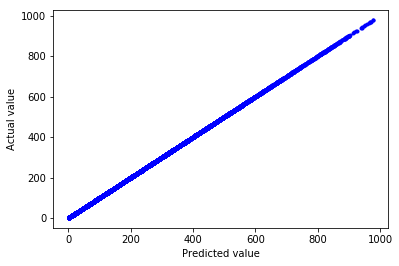

5.801216988938887e-06
2.9006084944694434e-06


In [123]:
# ================= Plotting hypothesis value vs actual value for train set=========
h = X.dot(theta.T)
plt.plot(h, y, 'b.')
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
plt.show()

print(mean_squared_error(h, y))
print(cost_function(X, y, theta))